<a href="https://colab.research.google.com/github/VivekKejriwal/TheSchoolOfAI/blob/main/Assignment_8/Submission_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/VivekKejriwal/TheSchoolOfAI

Cloning into 'TheSchoolOfAI'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 136 (delta 52), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (136/136), 820.31 KiB | 9.65 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [2]:
%cd TheSchoolOfAI/models

/content/TheSchoolOfAI/models


In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from config import ModelConfig
from data_engine import DataEngine
from train import train
from test import test
from validationplots import plot_misclassified_images, plot_graph
from utils import *

In [4]:
from resnet import ResNet18

In [5]:
# View model config
args = ModelConfig()
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 128,
  'dropout_value': 0.1,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1,
  'train_transform': None}

CUDA Available


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   car horse   dog


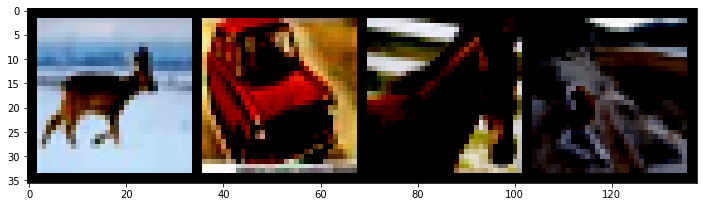

In [6]:
data = DataEngine(args)

dataiter = iter(data.train_loader)

images,labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))

print(' '.join('%5s' %  data.classes[labels[j]] for j in range(4)))


In [7]:
device = which_device()
model = ResNet18().to(device)
show_model_summary(model,device,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

def run():
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs, misclassified_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs = run()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.285104513168335 Batch_id=390 Accuracy=43.76: 100%|██████████| 391/391 [01:03<00:00,  6.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0100, Accuracy: 5299/10000 (52.99%)

EPOCH: 2


Loss=0.7621484398841858 Batch_id=390 Accuracy=62.17: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 6424/10000 (64.24%)

EPOCH: 3


Loss=0.7260792851448059 Batch_id=390 Accuracy=70.39: 100%|██████████| 391/391 [01:04<00:00,  6.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 6957/10000 (69.57%)

EPOCH: 4


Loss=0.6689480543136597 Batch_id=390 Accuracy=75.92: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 7002/10000 (70.02%)

EPOCH: 5


Loss=0.518953800201416 Batch_id=390 Accuracy=79.91: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 7405/10000 (74.05%)

EPOCH: 6


Loss=0.5909781455993652 Batch_id=390 Accuracy=83.03: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 7605/10000 (76.05%)

EPOCH: 7


Loss=0.31805068254470825 Batch_id=390 Accuracy=86.12: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0057, Accuracy: 7547/10000 (75.47%)

EPOCH: 8


Loss=0.41987109184265137 Batch_id=390 Accuracy=88.49: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 7658/10000 (76.58%)

EPOCH: 9


Loss=0.3132391571998596 Batch_id=390 Accuracy=90.71: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 7734/10000 (77.34%)

EPOCH: 10


Loss=0.30365902185440063 Batch_id=390 Accuracy=92.44: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 7778/10000 (77.78%)

EPOCH: 11


Loss=0.22674301266670227 Batch_id=390 Accuracy=93.89: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 7733/10000 (77.33%)

EPOCH: 12


Loss=0.3443763554096222 Batch_id=390 Accuracy=95.32: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 7908/10000 (79.08%)

EPOCH: 13


Loss=0.17087379097938538 Batch_id=390 Accuracy=96.15: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 7730/10000 (77.30%)

EPOCH: 14


Loss=0.15129557251930237 Batch_id=390 Accuracy=96.89: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 7603/10000 (76.03%)

EPOCH: 15


Loss=0.15667644143104553 Batch_id=390 Accuracy=97.38: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7952/10000 (79.52%)

EPOCH: 16


Loss=0.1135827898979187 Batch_id=390 Accuracy=98.14: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8076/10000 (80.76%)

EPOCH: 17


Loss=0.09103114902973175 Batch_id=390 Accuracy=98.66: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7978/10000 (79.78%)

EPOCH: 18


Loss=0.05710393190383911 Batch_id=390 Accuracy=98.91: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 8074/10000 (80.74%)

EPOCH: 19


Loss=0.036974865943193436 Batch_id=390 Accuracy=99.32: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 8083/10000 (80.83%)

EPOCH: 20


Loss=0.0347592830657959 Batch_id=390 Accuracy=99.46: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0057, Accuracy: 8144/10000 (81.44%)

EPOCH: 21


Loss=0.016352683305740356 Batch_id=390 Accuracy=99.72: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 8155/10000 (81.55%)

EPOCH: 22


Loss=0.004196587018668652 Batch_id=390 Accuracy=99.80: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 8138/10000 (81.38%)

EPOCH: 23


Loss=0.003974248189479113 Batch_id=390 Accuracy=99.86: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 8230/10000 (82.30%)

EPOCH: 24


Loss=0.018399450927972794 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 8170/10000 (81.70%)

EPOCH: 25


Loss=0.005074534565210342 Batch_id=390 Accuracy=99.97: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 8241/10000 (82.41%)

EPOCH: 26


Loss=0.0038843019865453243 Batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 8238/10000 (82.38%)

EPOCH: 27


Loss=0.012781861238181591 Batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 8248/10000 (82.48%)

EPOCH: 28


Loss=0.0017225209157913923 Batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8289/10000 (82.89%)

EPOCH: 29


Loss=0.0023524663411080837 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8273/10000 (82.73%)

EPOCH: 30


Loss=0.000926962005905807 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8274/10000 (82.74%)

EPOCH: 31


Loss=0.002566839335486293 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8258/10000 (82.58%)

EPOCH: 32


Loss=0.003134536324068904 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 8290/10000 (82.90%)

EPOCH: 33


Loss=0.001756461919285357 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8275/10000 (82.75%)

EPOCH: 34


Loss=0.0009638061746954918 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8306/10000 (83.06%)

EPOCH: 35


Loss=0.0014878620859235525 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8290/10000 (82.90%)

EPOCH: 36


Loss=0.001786684850230813 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 8285/10000 (82.85%)

EPOCH: 37


Loss=0.0017444302793592215 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 8274/10000 (82.74%)

EPOCH: 38


Loss=0.0017921965336427093 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8277/10000 (82.77%)

EPOCH: 39


Loss=0.0005707356031052768 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8267/10000 (82.67%)

EPOCH: 40


Loss=0.0013276477111503482 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8308/10000 (83.08%)

EPOCH: 41


Loss=0.001286799437366426 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8271/10000 (82.71%)

EPOCH: 42


Loss=0.0009148771641775966 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 8265/10000 (82.65%)

EPOCH: 43


Loss=0.0033545102924108505 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8261/10000 (82.61%)

EPOCH: 44


Loss=0.0014664559857919812 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 8285/10000 (82.85%)

EPOCH: 45


Loss=0.0005871919565834105 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 8299/10000 (82.99%)

EPOCH: 46


Loss=0.004612158052623272 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 8295/10000 (82.95%)

EPOCH: 47


Loss=0.0008675894932821393 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 8298/10000 (82.98%)

EPOCH: 48


Loss=0.0029059643857181072 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 8280/10000 (82.80%)

EPOCH: 49


Loss=0.0014189202338457108 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 8303/10000 (83.03%)

EPOCH: 50


Loss=0.0014238355215638876 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:04<00:00,  6.09it/s]
/content/TheSchoolOfAI/models/test.py:23: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct==0).nonzero()[:,0]


Test set: Average loss: 0.0055, Accuracy: 8282/10000 (82.82%)



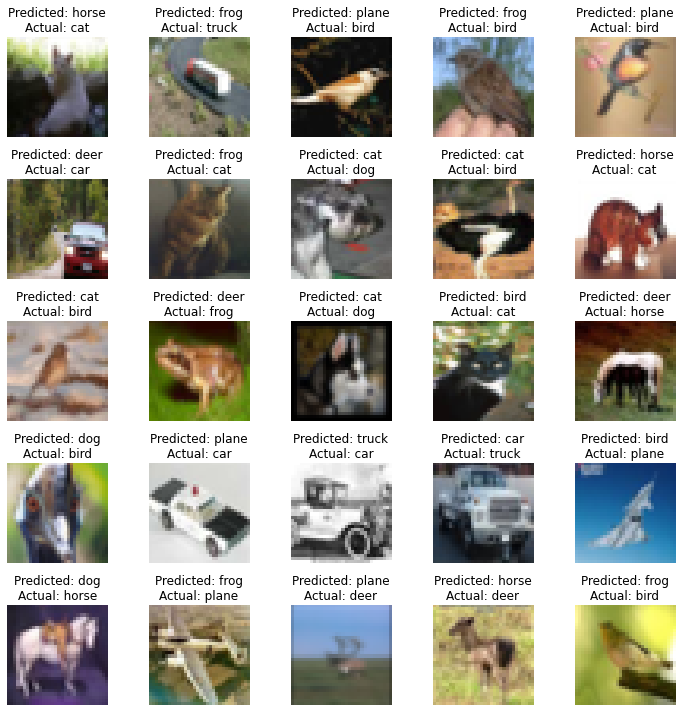

In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
			'frog', 'horse', 'ship', 'truck')

plot_misclassified_images(misclassified_imgs, classes, "misclassified_images.png")



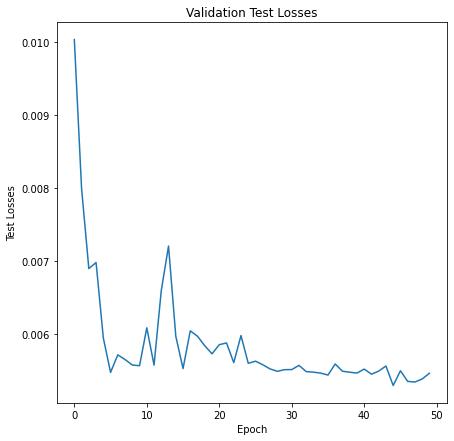

In [10]:
plot_graph(test_losses,"Test Losses")

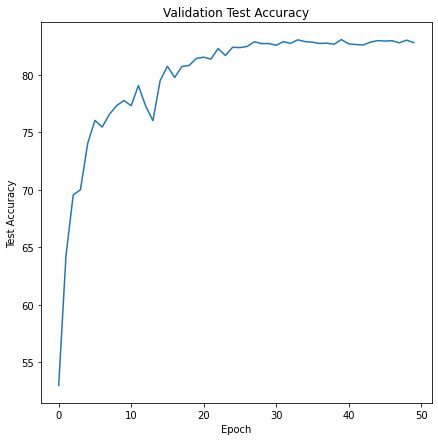

In [11]:
plot_graph(test_accs,"Test Accuracy")